# RGB Colors for All Planets

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [3]:
data_path = '../../DATA/ALL_composite/'
planet_names = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'titan', 'uranus', 'neptune']
planet_names_cap = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Titan', 'Uranus', 'Neptune']

planet_data = {}
for planet in planet_names:
    file_path = f'{data_path}{planet}_composite_data.txt'
    planet_data[planet] = np.genfromtxt(file_path, comments='#')

## Collect RGB values for each planet individually

In [20]:
blue_avg=[]
for planet in planet_names:
    data = planet_data[planet]
    blue_range = (data[:, 0] > 0.3858) & (data[:, 0] < 0.4858)
    blue_avg.append(np.average(data[blue_range, 1]))
    
green_avg=[]
for planet in planet_names:
    data = planet_data[planet]
    green_range = (data[:, 0] > 0.4961) & (data[:, 0] < 0.5961)
    green_avg.append(np.average(data[green_range, 1]))
    
red_avg=[]
for planet in planet_names:
    data = planet_data[planet]
    red_range = (data[:, 0] > 0.65) & (data[:, 0] < 0.75)
    red_avg.append(np.average(data[red_range, 1]))

# color_data= blue_avg,green_avg,red_avg
# color_data.to_csv('rgb_planet_data.txt')

### incorporate wavelengths as first value in each row

In [129]:
wavelengths_eff= [435.8, 546.1, 700] #nm

color_array = np.array([
    [wavelengths[0], *blue_avg],
    [wavelengths[1], *green_avg],
    [wavelengths[2], *red_avg]])

#np.savetxt('rgb_planet_data_2.txt', color_array, delimiter=' ')

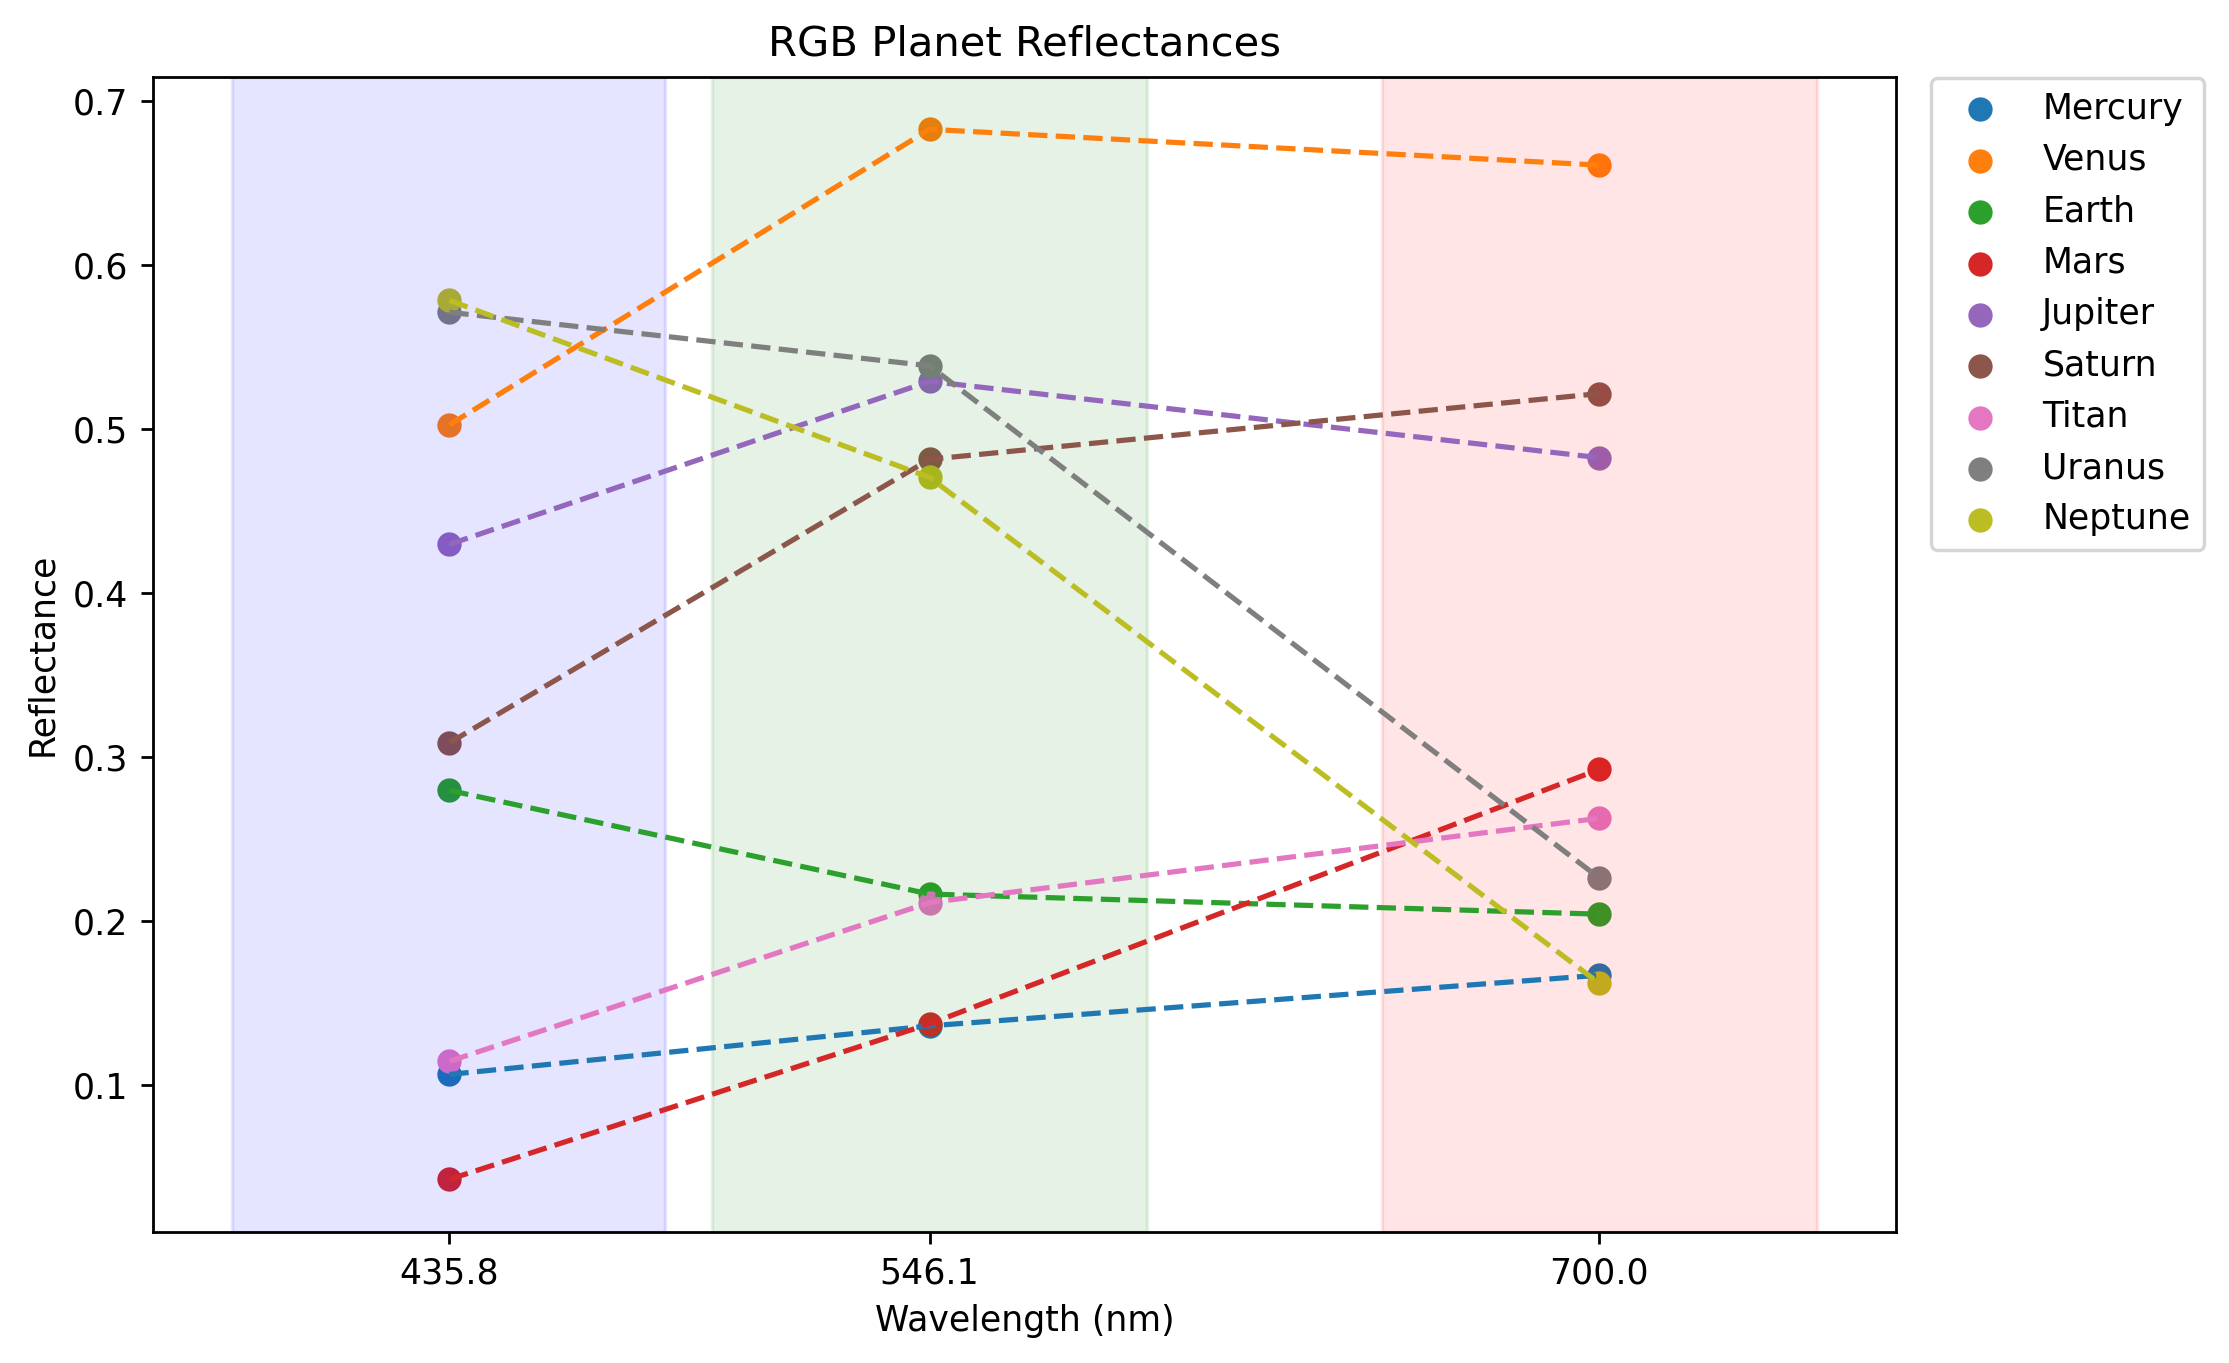

In [144]:
plt.figure(figsize=(9,6), dpi=250)

# Create a colormap (one color per planet)
planet_colors = plt.cm.tab10(range(len(planet_names_cap)))  # 9 distinct colors

# Loop through each planet
for i, (planet_name, color) in enumerate(zip(planet_names_cap, planet_colors)):
    # Collect the 3 wavelength values and their reflectance for planet i
    wavelengths = [color_array[j][0] for j in range(3)]         # 435.8, 546.1, 700.0
    reflectances = [color_array[j][i + 1] for j in range(3)]    # reflectances for planet i

    # Plot all 3 points for this planet in the same color
    plt.scatter(wavelengths, reflectances, color=color, label=planet_name)
    plt.plot(wavelengths, reflectances, color=color,linestyle='dashed')

plt.legend()
xticks = [color_array[0][0], color_array[1][0], color_array[2][0]]  # [435.8, 546.1, 700.0]
plt.xticks(xticks) 
plt.axvspan(385.8, 485.3, color='blue', alpha=0.1)
plt.axvspan(496.1, 596.1, color='green', alpha=0.1)
plt.axvspan(650, 750, color='red', alpha=0.1)

# Labels and legend
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title("RGB Planet Reflectances")
plt.legend(loc=(1.02,0.59))
plt.savefig('rgb_colors.png', bbox_inches='tight');

## Create Normalized Plot

In [138]:
color_array

array([[4.35800000e+02, 1.06572500e-01, 5.02649228e-01, 2.79743495e-01,
        4.26330184e-02, 4.29778800e-01, 3.08786400e-01, 1.14578970e-01,
        5.71263200e-01, 5.78523200e-01],
       [5.46100000e+02, 1.36176000e-01, 6.82817479e-01, 2.16549862e-01,
        1.37399351e-01, 5.29151200e-01, 4.81616800e-01, 2.11373863e-01,
        5.38609600e-01, 4.70569600e-01],
       [7.00000000e+02, 1.67080000e-01, 6.60967133e-01, 2.04282104e-01,
        2.92625129e-01, 4.82585542e-01, 5.21698795e-01, 2.62777079e-01,
        2.26265060e-01, 1.62070281e-01]])

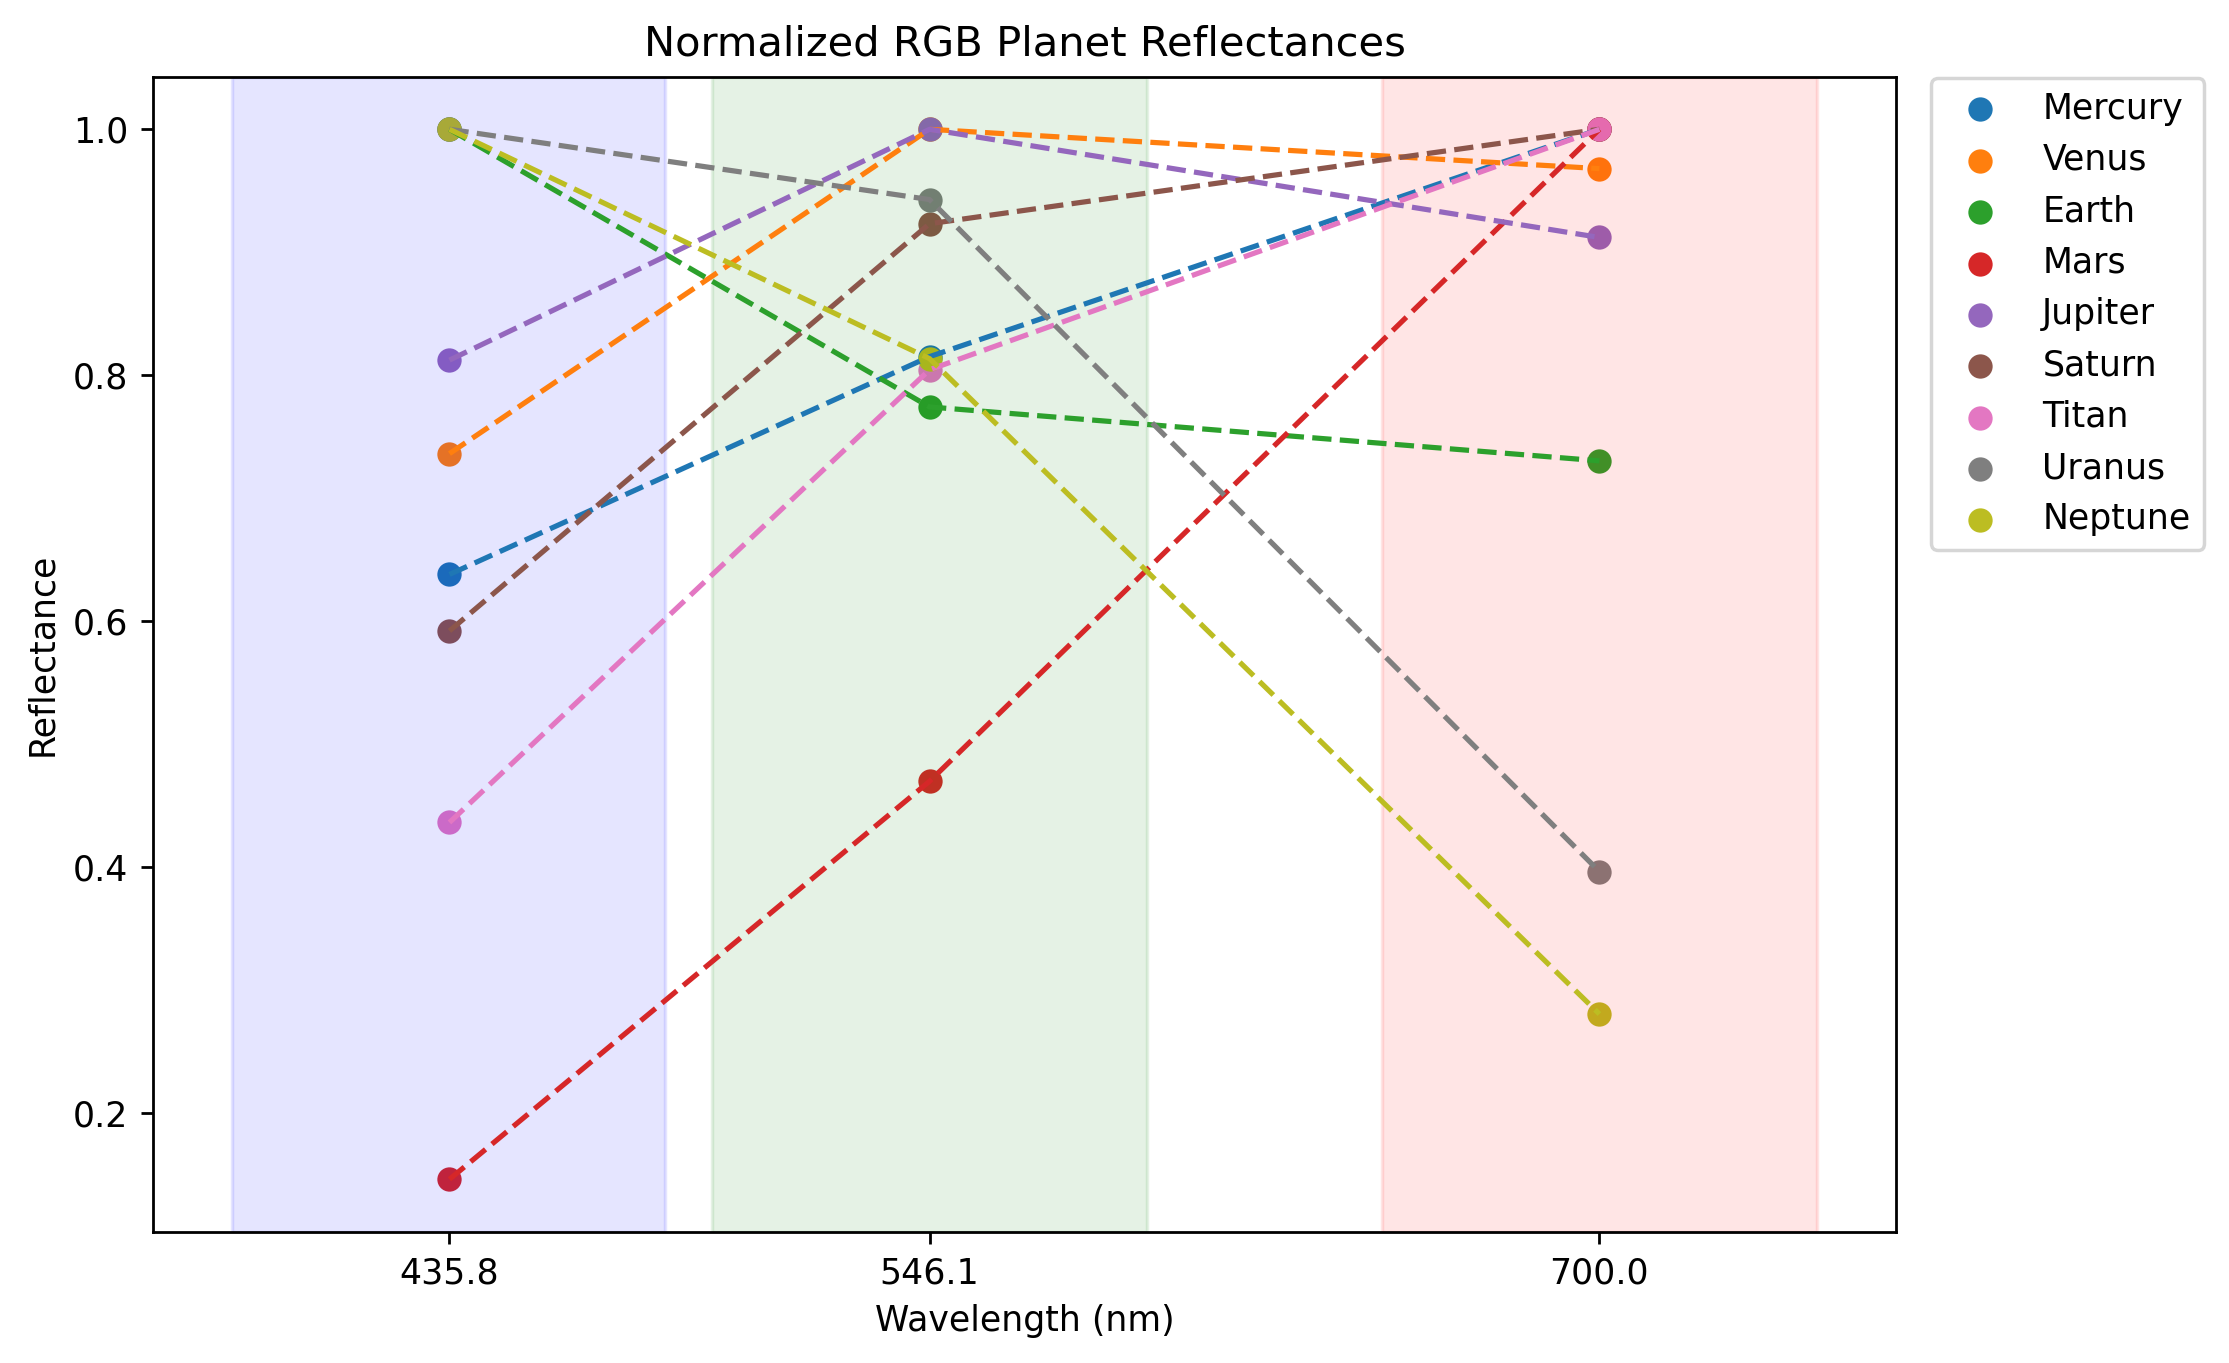

In [146]:
plt.figure(figsize=(9,6), dpi=250)

# Create a colormap (one color per planet)
planet_colors = plt.cm.tab10(range(len(planet_names_cap)))  # 9 distinct colors

# Loop through each planet
for i, (planet_name, color) in enumerate(zip(planet_names_cap, planet_colors)):
    # Collect the 3 wavelength values and their reflectance for planet i
    wavelengths = [color_array[j][0] for j in range(3)]         # 435.8, 546.1, 700.0
    reflectances = [color_array[j][i + 1] for j in range(3)]    # reflectances for planet i
    max_ref= np.max(reflectances)
    #print(max_ref)

    # Plot all 3 points for this planet in the same color
    plt.scatter(wavelengths, reflectances/max_ref, color=color, label=planet_name)
    plt.plot(wavelengths, reflectances/max_ref, color=color,linestyle='dashed')

plt.legend()
xticks = [color_array[0][0], color_array[1][0], color_array[2][0]]  # [435.8, 546.1, 700.0]
plt.xticks(xticks) 
plt.axvspan(385.8, 485.3, color='blue', alpha=0.1)
plt.axvspan(496.1, 596.1, color='green', alpha=0.1)
plt.axvspan(650, 750, color='red', alpha=0.1)

# Labels and legend
plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title("Normalized RGB Planet Reflectances")
plt.legend(loc=(1.02,0.59))
plt.savefig('rgb_colors_normalized.png', bbox_inches='tight');